<a href="https://colab.research.google.com/github/margazadasha/Machine-learning-ML/blob/main/%D0%9C%D0%B0%D1%80%D0%B3%D0%B0%D0%B7%D0%B0_4_6%D0%A4%D0%86%D0%A2_%D0%9F%D0%A0%E2%84%969_%D0%97%D0%B0%D0%B2%D0%B4%D0%B0%D0%BD%D0%BD%D1%8F2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Лабораторна робота №9
Згорткові нейронні мережі.
#Завдання 2. Побудувати попередньо навчену модель VGG16.

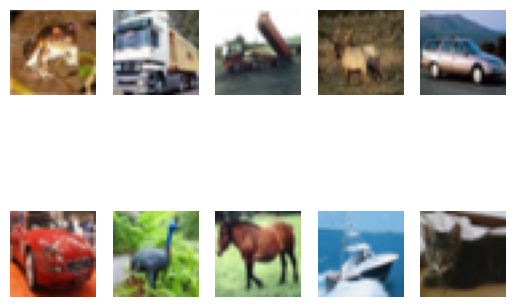

In [10]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

#Завантаження датасету CIFAR-10.
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

#Виведення перших 10 зображень.
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_train[i])
    plt.axis('off')
plt.show()

#Нормалізація даних.
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

#Переведення міток у категоріальний формат.
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [11]:
#Завантаження VGG16 без верхніх шарів.
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

#Заморожування перших 15 шарів.
for layer in base_model.layers[:15]:
    layer.trainable = False

In [12]:
#Додавання нових шарів.
x = Flatten()(base_model.output)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(10, activation='softmax')(x)  #10 класів у CIFAR-10.

#Створення нової моделі.
model = Model(inputs=base_model.input, outputs=x)

#Виведення структури моделі.
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 32, 32, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 32, 32, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 16, 16, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 8, 8, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 8, 8, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 8, 8, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 4, 4, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 2, 2, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 2, 2, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 2, 2, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 1, 1, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 15,111,242 (57.64 MB)

 Trainable params: 7,475,978 (28.52 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

In [14]:
#Компіляція моделі.
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
#Колбеки для ранньої зупинки та зменшення швидкості навчання.
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=0.00001)

In [16]:
#Аугментація даних.
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True)
datagen.fit(X_train)

In [17]:
#Навчання моделі.
history = model.fit(datagen.flow(X_train, y_train, batch_size=64),
                    validation_data=(X_test, y_test),
                    epochs=50,
                    callbacks=[early_stopping, reduce_lr])

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


782/782 ━━━━━━━━━━━━━━━━━━━━ 49s 57ms/step - accuracy: 0.3582 - loss: 1.7829 - val_accuracy: 0.6697 - val_loss: 0.9623 - learning_rate: 1.0000e-04
Epoch 2/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 40s 50ms/step - accuracy: 0.6262 - loss: 1.1188 - val_accuracy: 0.6952 - val_loss: 0.8979 - learning_rate: 1.0000e-04
Epoch 3/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 40s 50ms/step - accuracy: 0.6665 - loss: 0.9926 - val_accuracy: 0.7146 - val_loss: 0.8338 - learning_rate: 1.0000e-04
Epoch 4/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 42s 51ms/step - accuracy: 0.6967 - loss: 0.9053 - val_accuracy: 0.7142 - val_loss: 0.8310 - learning_rate: 1.0000e-04
Epoch 5/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 39s 50ms/step - accuracy: 0.7077 - loss: 0.8647 - val_accuracy: 0.7173 - val_loss: 0.8509 - learning_rate: 1.0000e-04
Epoch 6/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 39s 50ms/step - accuracy: 0.7309 - loss: 0.8163 - val_accuracy: 0.7280 - val_loss: 0.8126 - learning_rate: 1.0000e-04
Epoch 7/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 39s 50ms/step - accurac

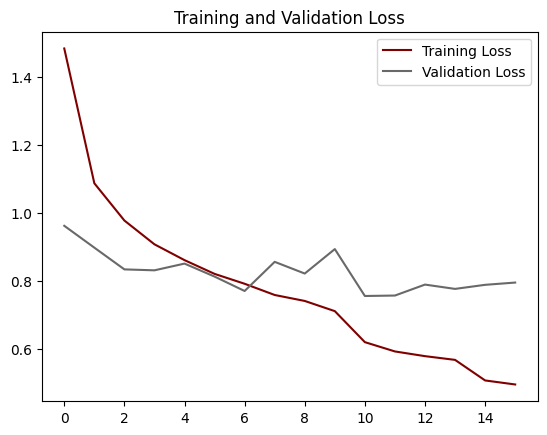

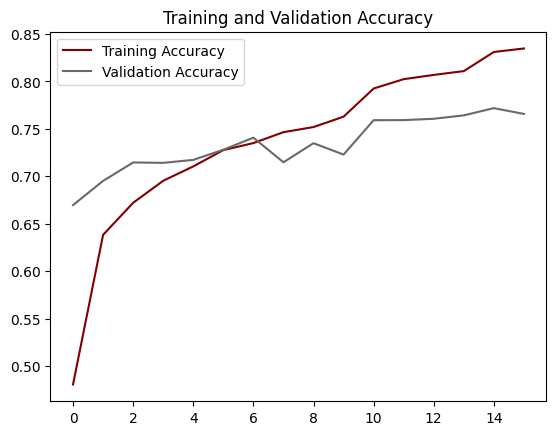

In [18]:
# Графік функції втрат.
plt.plot(history.history['loss'], label='Training Loss', color = 'maroon')
plt.plot(history.history['val_loss'], label='Validation Loss', color = 'dimgray')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Графік функції точності.
plt.plot(history.history['accuracy'], label='Training Accuracy', color = 'maroon')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color = 'dimgray')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

In [20]:
#Оцінка моделі і виведення класифікаційного звіту.
from sklearn.metrics import classification_report
import numpy as np
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

print(classification_report(y_true, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
              precision    recall  f1-score   support

           0       0.81      0.85      0.83      1000
           1       0.80      0.88      0.84      1000
           2       0.75      0.68      0.71      1000
           3       0.66      0.51      0.58      1000
           4       0.78      0.65      0.71      1000
           5       0.72      0.64      0.68      1000
           6       0.65      0.89      0.75      1000
           7       0.77      0.85      0.81      1000
           8       0.92      0.79      0.85      1000
           9       0.76      0.85      0.80      1000

    accuracy                           0.76     10000
   macro avg       0.76      0.76      0.76     10000
weighted avg       0.76      0.76      0.76     10000



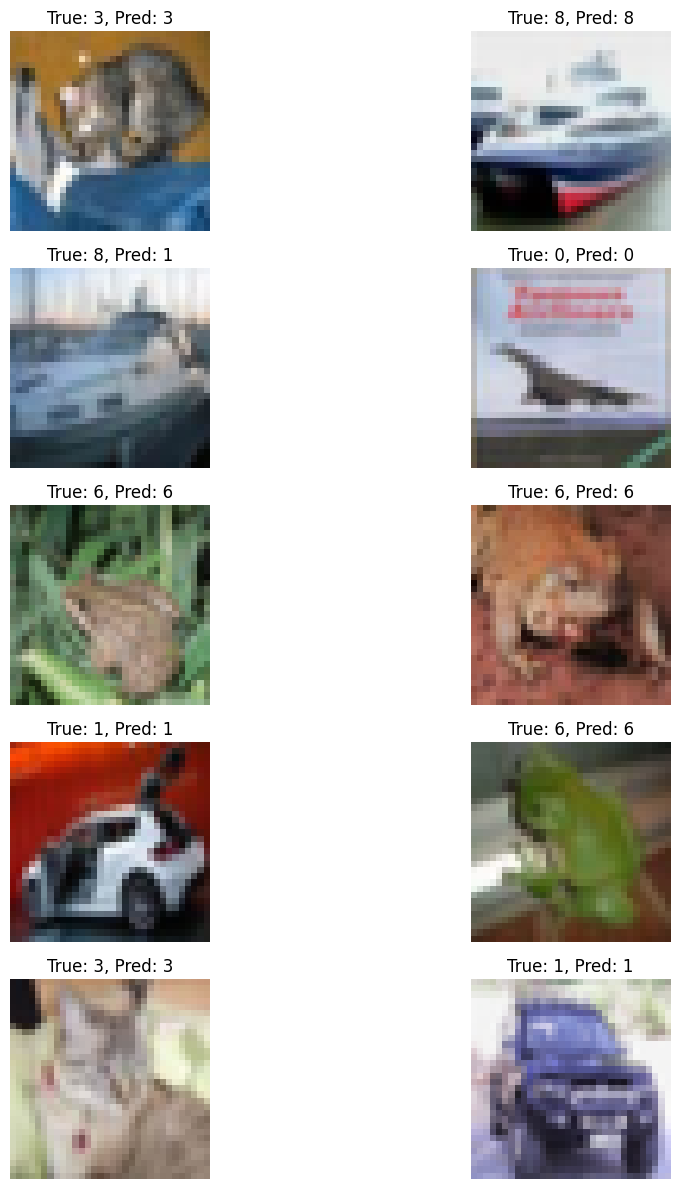

In [24]:
#Візуалізація перших 10 тестових зображень з прогнозованими та справжніми класами.
plt.figure(figsize=(12, 12))  #Збільшення розміру фігури для більш чітких зображень.

for i in range(10):
    plt.subplot(5, 2, i+1)  #Розміщення зображень у сітці.
    plt.imshow(X_test[i])  #Відображення зображень з тестового набору.
    plt.title(f"True: {y_true[i]}, Pred: {y_pred_classes[i]}")  #Відображення істинних та прогнозованих класів.
    plt.axis('off')  #Відключення осей для більш чистого вигляду.

plt.tight_layout()  #Оптимізація розміщення графіків.
plt.show()

Висновок: В цьому завданні була побудувана нейронна мережа на основі попередньо навченої моделі VGG16 для класифікації зображень із набору даних CIFAR-10. Модель була доопрацьована шляхом заморожування перших 15 шарів і додавання нових шарів для покращення класифікації. Було застосовано аугментацію даних для покращення генералізації, а також колбеки (рання зупинка та зменшення швидкості навчання). Візуалізація результатів та класифікаційний звіт підтвердили коректність роботи моделі.